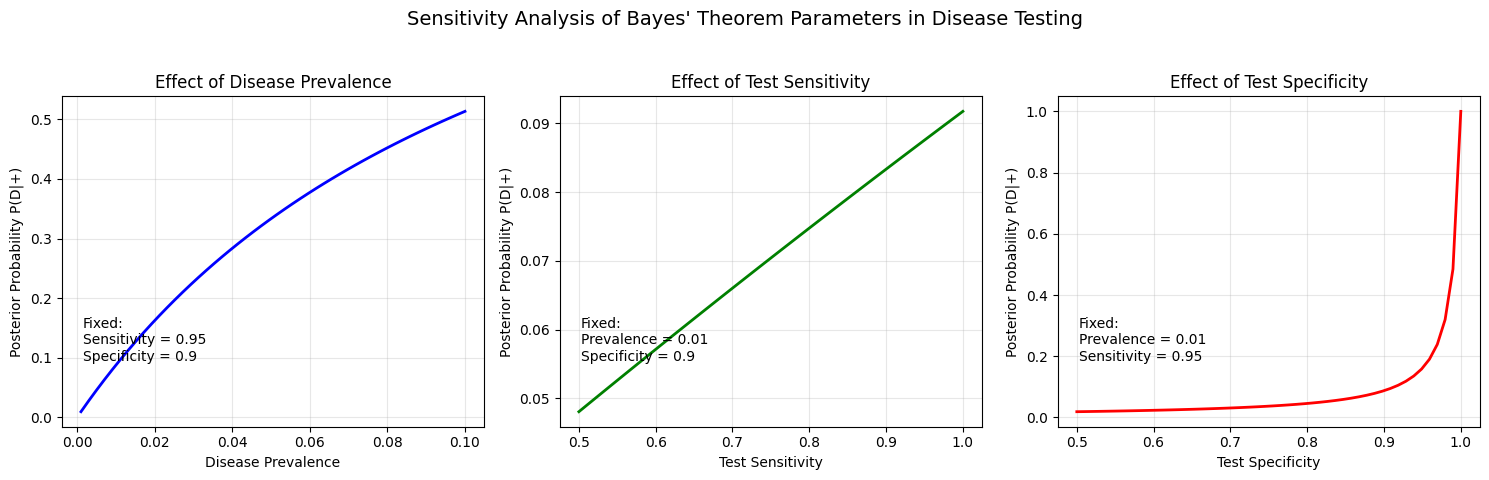

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calc_posterior(prevalence, sens, spec):
    return (sens * prevalence) / (sens * prevalence + (1 - spec) * (1 - prevalence))

base_prevalence = 0.01  
base_sens = 0.95       
base_spec = 0.90      

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(
    'Sensitivity Analysis of Bayes\' Theorem Parameters in Disease Testing', fontsize=14)

prev_range = np.linspace(0.001, 0.1, 50)
post_by_prev = [calc_posterior(p, base_sens, base_spec) for p in prev_range]

ax[0].plot(prev_range, post_by_prev, 'b-', linewidth=2)
ax[0].set_xlabel('Disease Prevalence')
ax[0].set_ylabel('Posterior Probability P(D|+)')
ax[0].set_title('Effect of Disease Prevalence')
ax[0].grid(alpha=0.3)
ax[0].annotate(f'Fixed:\nSensitivity = {base_sens}\nSpecificity = {base_spec}',
               xy=(0.05, 0.2), xycoords='axes fraction')

sens_range = np.linspace(0.5, 1.0, 50)
post_by_sens = [calc_posterior(base_prevalence, s, base_spec)
                for s in sens_range]

ax[1].plot(sens_range, post_by_sens, 'g-', linewidth=2)
ax[1].set_xlabel('Test Sensitivity')
ax[1].set_ylabel('Posterior Probability P(D|+)')
ax[1].set_title('Effect of Test Sensitivity')
ax[1].grid(alpha=0.3)
ax[1].annotate(f'Fixed:\nPrevalence = {base_prevalence}\nSpecificity = {base_spec}',
               xy=(0.05, 0.2), xycoords='axes fraction')

spec_range = np.linspace(0.5, 1.0, 50)
post_by_spec = [calc_posterior(base_prevalence, base_sens, s)
                for s in spec_range]

ax[2].plot(spec_range, post_by_spec, 'r-', linewidth=2)
ax[2].set_xlabel('Test Specificity')
ax[2].set_ylabel('Posterior Probability P(D|+)')
ax[2].set_title('Effect of Test Specificity')
ax[2].grid(alpha=0.3)
ax[2].annotate(f'Fixed:\nPrevalence = {base_prevalence}\nSensitivity = {base_sens}',
               xy=(0.05, 0.2), xycoords='axes fraction')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()